In [89]:
import pandas as pd
import sqlite3
import re
import string
import nltk
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
FILE = '/content/tweet_berita.db'
con = sqlite3.connect(FILE)
query = '''SELECT * FROM kompas'''
data = pd.read_sql_query(query, con)
data.head()

,Kompascom
0,"Dalam draf sementara, Revisi UU Pemilu menyebu..."
1,"""Sudah waktunya angka ini kita upayakan bersam..."
2,Eiger adalah salah satu merek perlengkapan out...
3,PSSI resmi menetapkan Kongres Tahunan PSSI 202...
4,Fabio Quartararo memutuskan menjadi pebalap us...


In [51]:
prep = []
stopword = set(stopwords.words('indonesian'))
for val in data['Kompascom'].values:
  low = val.lower()
  junk = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", low)
  junk_num = re.sub(r'^\d+\s|\d+$|\d+\s|\s\d+', '', junk)
  punct = junk_num.translate(str.maketrans('','',string.punctuation)).strip()
  token = word_tokenize(punct)
  stop_word = ' '.join([word for word in token if not word in stopword])
  prep.append(stop_word)
prep[:3]

['draf revisi uu pemilu menyebut pilkada serentak partai',
 'angka upayakan turun wiku',
 'eiger salah merek perlengkapan outdoor negeri relatif terkenal eiger merek lokal perlengkapan outdoor terkenal lifestyle']

In [70]:
countw = CountVectorizer()
fitted = countw.fit_transform(prep)
count_tokens = countw.get_feature_names()
df_countvect = pd.DataFrame(data = fitted.toarray(),columns = count_tokens)
df_countvect.head()

,aborsi,abu,ade,agung,airlangga,ajang,aksi,aktif,al,alami,alat,ali,aliff,alihkan,alissawi,alli,alsistani,aman,amanda,ambulans,anak,and,angelica,anggota,angka,angkle,apdi,apoteker,apple,arap,arsenal,arteri,artikel,asam,asep,asli,asuransi,aturan,ayatollah,badan,...,trofi,tua,tubuh,tujuan,turun,uang,ugm,unbreakable,undangundang,unit,united,upayakan,update,urutan,usaha,usianya,utama,uu,vicky,video,viral,virus,visa,vs,wakaf,wakil,warga,warganet,waspada,wejangan,whatsapp,wiku,wilayah,wisata,world,xiaomi,yaser,yasin,youtuber,yzrmdan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


[('indonesia', 9), ('salah', 8), ('whatsapp', 7), ('eiger', 6), ('rumah', 6), ('polisi', 6), ('irak', 5), ('terkait', 5), ('merek', 4), ('motor', 4)]


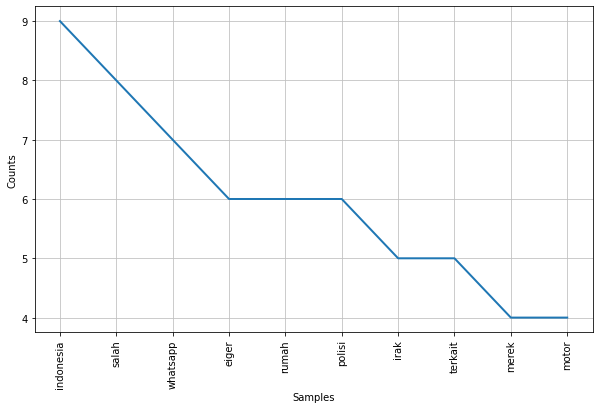

In [87]:
token = [word_tokenize(paragraf) for paragraf in prep]
token = list(itertools.chain(*token))
freq = FreqDist(token)
print(freq.most_common(10))
plt.figure(figsize=(10,6))
freq.plot(10)
plt.show()

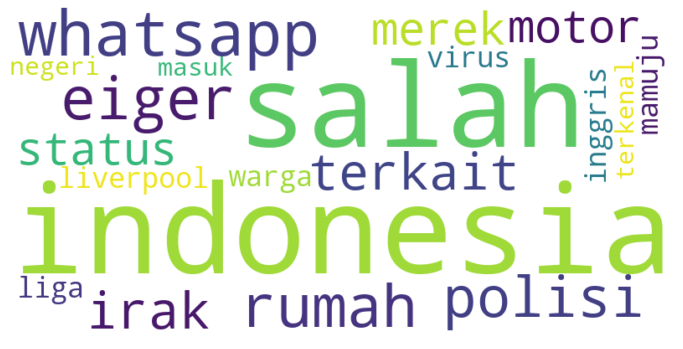

In [97]:
sentence = ' '.join(token)
cloud = WordCloud(width=800, height=400, max_words=20,background_color='white', max_font_size=150).generate(sentence)
plt.figure(figsize=(12,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()